Proyecto diabetes


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


In [2]:
df_diabetes = pd.read_csv("diabetes.csv")

In [3]:
df_diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df_diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
df_diabetes.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df_diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

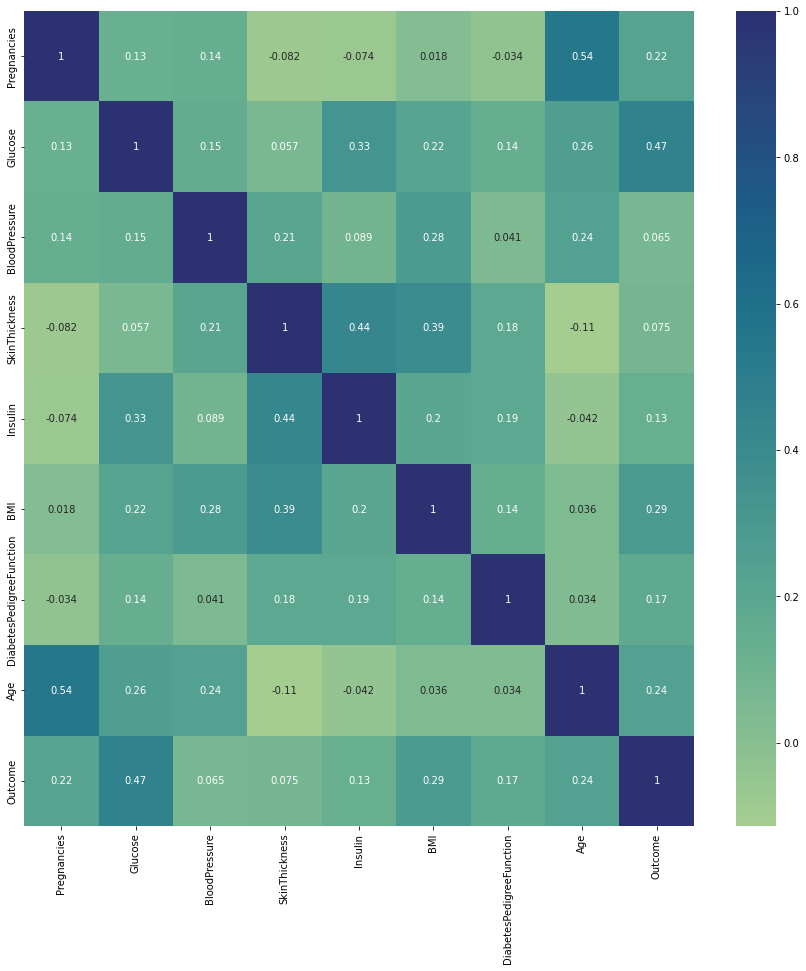

In [8]:
#Se crea matriz de correlacion para ver si existen varibales que aportan o que no aportan al modelo para así poder evaluar si es necesario sacarlas.
correlacion =df_diabetes.corr()


plt.figure(figsize=(15,15))
g=sns.heatmap(correlacion,annot=True,cmap="crest")



In [9]:
#Tal como se ve, existen datos que son 0 y estos afectaran en la precisión del modelo


In [10]:
df_diabetes.groupby(["Outcome"]).mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [11]:
#Separamos los datos de las etiquetas
X= df_diabetes.drop(columns="Outcome",axis=1)
Y= df_diabetes["Outcome"]

In [12]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [13]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [14]:
#Handling missing/zero values
from sklearn.impute import SimpleImputer as Imputer
fill_val = Imputer(missing_values = 0, strategy = 'mean')
fill_val = fill_val.fit(X)
X_clean=fill_val.transform(X)

In [15]:
#Procedemos a estandarizar los datos 
standar = StandardScaler()    
standar.fit(X_clean)
data_std = standar.transform(X_clean)

In [16]:
X_std = data_std
Y = df_diabetes["Outcome"]

In [17]:
print(X_std)

[[ 0.50625491  0.86510807 -0.03351824 ...  0.16629174  0.46849198
   1.4259954 ]
 [-1.17528945 -1.20616153 -0.52985903 ... -0.85253118 -0.36506078
  -0.19067191]
 [ 1.17887265  2.0158134  -0.69530596 ... -1.33283341  0.60439732
  -0.10558415]
 ...
 [ 0.16994604 -0.0225789  -0.03351824 ... -0.91074963 -0.68519336
  -0.27575966]
 [-1.17528945  0.14180757 -1.02619983 ... -0.34311972 -0.37110101
   1.17073215]
 [-1.17528945 -0.94314317 -0.19896517 ... -0.29945588 -0.47378505
  -0.87137393]]


In [18]:
#Separar datos de testeo y entrenamiento
X_train,X_test,Y_train,Y_test =  train_test_split(X_std,Y,test_size=0.2,train_size=0.8,stratify=Y ,random_state=2)

In [19]:
print(X_std.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


In [20]:
#entrenamietno del modelo
clasificador = svm.SVC(kernel="linear",random_state=0)

In [21]:
#entrenamiento del SVMC
clasificador.fit(X_train,Y_train)

SVC(kernel='linear', random_state=0)

Accuracy


In [22]:
X_train_prediction = clasificador.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [23]:
print("Accuracy score de los datos de entrenamiento: " , training_data_accuracy *100,"%") 

Accuracy score de los datos de entrenamiento:  78.33876221498372 %


In [24]:
X_test_prediction = clasificador.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [25]:
print("Accuracy score de los datos de testeo: " , test_data_accuracy *100,"%") 

Accuracy score de los datos de testeo:  76.62337662337663 %


Modelo predictivo


In [26]:
data_input=(8,183,64,0,0,23.3,0.672,32)

#Se debe trabajar como array y luego ahcer reshape para poder introducirlo al modelo
data_input_array = np.asarray(data_input)

reshape_data = data_input_array.reshape(1,-1)


In [27]:
#Se procede a estandarizar los datos que se ingresan al modelo y una vez estandarizados, se realiza la prediccion
reshape_std = standar.transform(reshape_data)
reshape_prediction = clasificador.predict(reshape_std)
print(reshape_prediction)

[1]


In [28]:
if reshape_prediction[0] == 0:
    print("La persona no es diabetica")
elif reshape_prediction[0]==1:
    print("La persona es diabetica")

La persona es diabetica
